In [40]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

import matplotlib.ticker                         # here's where the formatter is


***

# TweetsCov19
## KDE-Plot

***

In [2]:
path = '../data/tweetsCov19_polarized_users_deletionratio_reputation.tsv'

df_tweetscov19 = pd.read_csv(path, sep='\t', error_bad_lines=False, names=[ "Username", 'politic', 'science', 'moderacy', 'Deletion_ratio', 'Reputation', 'is_deleted'])

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (2216076, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,00008ca06f863b962f72cc9167d7978a,-1.0000,0.0000,-1.0000,0.0000,0.1828,False
1,00008de3f61d5f04329ee6867d5475b9,-1.0000,0.0000,1.0000,1.0000,0.6003,True
2,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
3,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
4,00016e20a3865cb74581803c27d27b89,-1.0000,0.0000,-1.0000,0.0000,0.5896,False


In [3]:
df_tweetscov19 = df_tweetscov19[df_tweetscov19['politic'] != 0]

print('Shape: ', df_tweetscov19.shape)
df_tweetscov19.head()

Shape:  (1973156, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,00008ca06f863b962f72cc9167d7978a,-1.0000,0.0000,-1.0000,0.0000,0.1828,False
1,00008de3f61d5f04329ee6867d5475b9,-1.0000,0.0000,1.0000,1.0000,0.6003,True
2,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
3,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
4,00016e20a3865cb74581803c27d27b89,-1.0000,0.0000,-1.0000,0.0000,0.5896,False


In [4]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [5]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['politic']>0]
print('Alle kon. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['politic']<0]
print('Alle lib. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 171353
Alle kon. Users in gesammten Tweets: 36179
Alle lib. Users in gesammten Tweets: 135174


In [6]:
print('Alle Users:', df_tweetscov19_del.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['politic']>0]
print('Alle kon. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['politic']<0]
print('Alle lib. Users in gelöschten Tweets:', df.Username.unique().size)

Alle Users: 38986
Alle kon. Users in gelöschten Tweets: 10989
Alle lib. Users in gelöschten Tweets: 27997


In [7]:
print('Alle Users:', df_tweetscov19_undel.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['politic']>0]
print('Alle kon. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['politic']<0]
print('Alle lib. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 147054
Alle kon. Users in nicht gelöschten Tweets: 28368
Alle lib. Users in nicht gelöschten Tweets: 118686


In [8]:
def plot_kdeplot_v1(df, hue, x, x_label, titel, name): 
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('../plots/'+name+'.pdf')


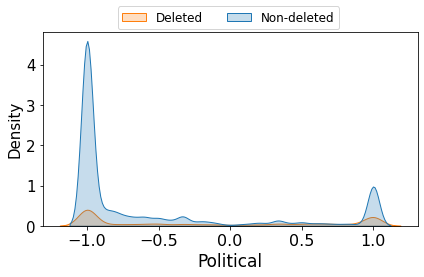

In [9]:
df = df_tweetscov19[['is_deleted', 'politic']]
plot_kdeplot_v1(df, 'is_deleted','politic' ,'Political' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_conditionaldistribution')

In [11]:
def plot_kdeplot_v2(df, hue, x, x_label, titel, name): 
    ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('../plots/'+name+'.pdf')


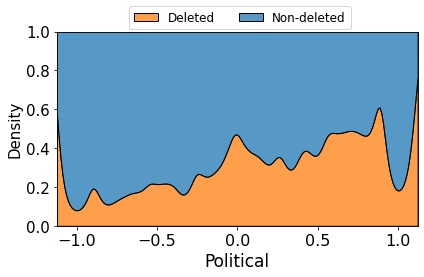

In [12]:
df = df_tweetscov19[['is_deleted', 'politic']]
plot_kdeplot_v2(df, 'is_deleted','politic' ,'Political' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_Normalizethestackeddistribution')

In [13]:
def plot_kdeplot_v3(df, hue, x, x_label, titel, name): 
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    ax = sns.kdeplot(
    data=df, x=x, hue=hue,
    cumulative=True, common_norm=False, common_grid=True,
    )
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('../plots/'+name+'.pdf')


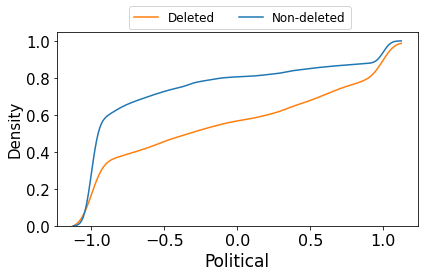

In [14]:
df = df_tweetscov19[['is_deleted', 'politic']]
plot_kdeplot_v3(df, 'is_deleted','politic' ,'Political' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_cumulativedistributionfunction')

***

# Histogram

***

In [15]:
def plot_histogram(df, titel):
    
    #figure(figsize=(8, 6), dpi=80)
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('b')
    patches[1].set_label('Liberal')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('r')
    patches[9].set_label('Conservative')
        
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Number of users', fontsize=16)
    ax.set_xlabel(xlabel='Politic', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=12)
    plt.tight_layout()

    plt.savefig('../plots/'+titel+'.pdf')

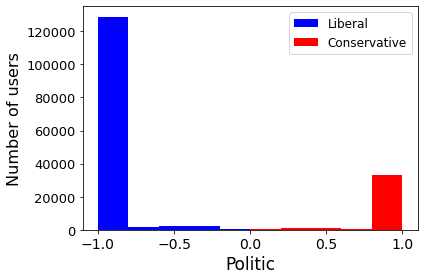

In [16]:
df = df_tweetscov19.drop_duplicates(subset=['Username'])
plot_histogram(df['politic'],'hist_tweetsCov19_political_polarized_users(alltweets)')

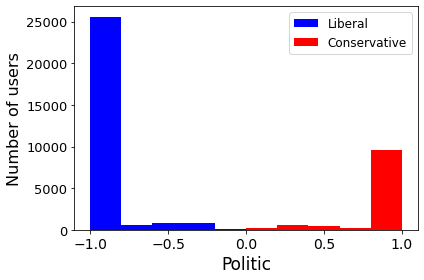

In [17]:
df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
plot_histogram(df['politic'],'hist_tweetsCov19_political_polarized_users(deletedtweets)')

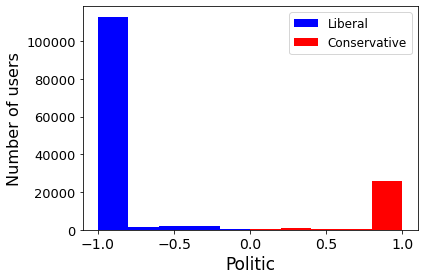

In [18]:
df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
plot_histogram(df['politic'],'hist_tweetsCov19_political_polarized_users(nondeletedtweets)')

***

# Hexabin
### Reputation-Polarisierung

In [47]:
def plot_hexbin_reputaion(df, hue,x ,x_label, color, titel):
    
    ax = df.plot.hexbin(x=x, y="Reputation",cmap=color, gridsize=20, sharex=False)
    ax.set_ylabel(ylabel='Reputaion', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=16)
    
    
    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig('../plots/'+titel+'.pdf')
    plt.show()

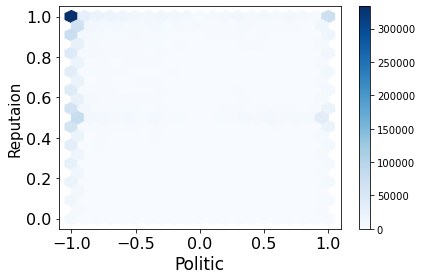

In [48]:
df = df_tweetscov19[['is_deleted', 'politic', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted','politic', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(alltweets)')

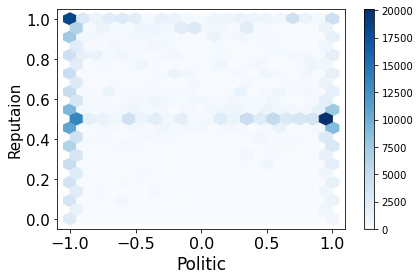

In [44]:
plot_hexbin_reputaion(df_del, 'is_deleted','politic', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(deletedtweets)')

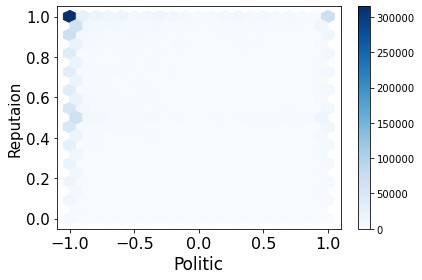

In [33]:
plot_hexbin_reputaion(df_undel, 'is_deleted','politic', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(nondeletedtweets)')

***

In [52]:
def plot_hexbin_reputaion(df, hue,x ,x_label, color, titel):
    
    #ax = df.plot.hexbin(x=x, y="Reputation",cmap=color, gridsize=20, sharex=False)
    ax = sns.jointplot(x=df[x], y=df['Reputation'], kind="hex", gridsize=25,cmap=color)
    #ax.set_ylabel(ylabel='Reputaion', fontsize=15)
    #ax.set_xlabel(xlabel=x_label, fontsize=17)

    #ax.tick_params(axis='x', which='major', labelsize=16)
    #ax.tick_params(axis='y', which='major', labelsize=15)
    #ax.colorbar(  fontsize=15)

        
    #fig = ax.get_figure()
    #fig.tight_layout()

    #fig.savefig('../plots/'+titel+'.pdf')
    plt.show()

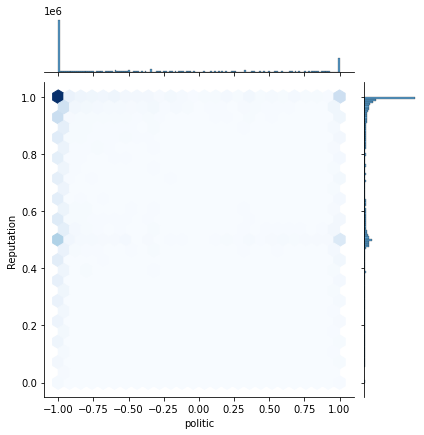

In [53]:
df = df_tweetscov19[['is_deleted', 'politic', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted','politic', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(alltweets)')

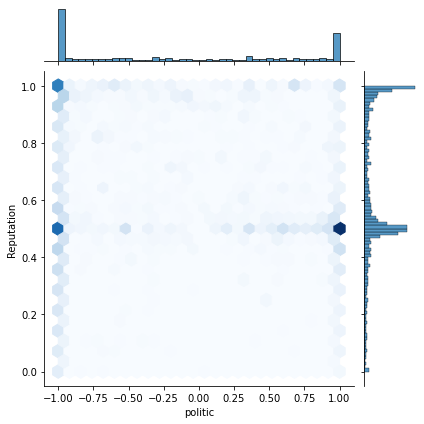

In [54]:
plot_hexbin_reputaion(df_del, 'is_deleted','politic', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(deletedtweets)')

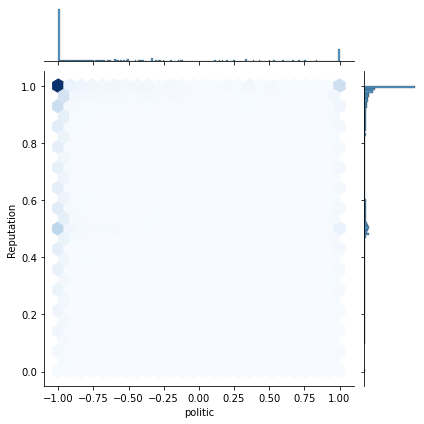

In [55]:
plot_hexbin_reputaion(df_undel, 'is_deleted','politic', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(nondeletedtweets)')

In [24]:
def plot_hexbin_reputaion(df, hue,x ,x_label, color, titel):
    
    #ax = df.plot.hexbin(x=x, y="Reputation",cmap=color, gridsize=20, sharex=False)
    #ax = sns.jointplot(x=df[x], y=df['Reputation'], kind="hex", gridsize=25, color="#4CB391")
    ax = sns.jointplot(x=df[x], y=df['Reputation'], kind="hex", gridsize=25,cmap=color)
    plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  
    cbar_ax = ax.fig.add_axes([.85, .25, .05, .4])
    
    plt.colorbar(cax=cbar_ax)
    #plt.show()
    #ax.set_ylabel(ylabel='Reputaion', fontsize=15)
    #ax.set_xlabel(xlabel=x_label, fontsize=17)

    #ax.tick_params(axis='x', which='major', labelsize=16)
    #ax.tick_params(axis='y', which='major', labelsize=15)
    #ax.colorbar(  fontsize=15)

        
    #fig = ax.get_figure()
    fig = ax.fig
    #fig.tight_layout()

    fig.savefig('../plots/'+titel+'.pdf')
    plt.show()

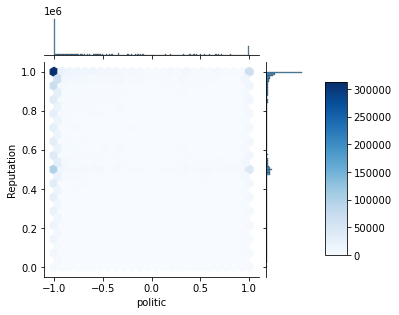

In [25]:
df = df_tweetscov19[['is_deleted', 'politic', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted','politic', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(alltweets)')

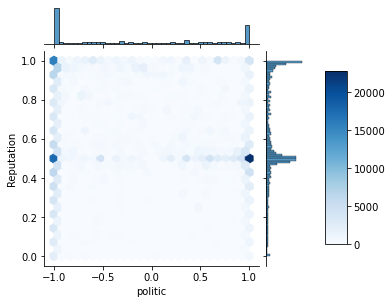

In [26]:
plot_hexbin_reputaion(df_del, 'is_deleted','politic', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(deletedtweets)')

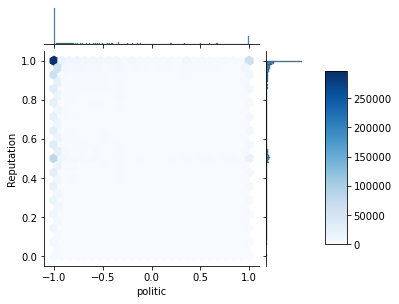

In [27]:
plot_hexbin_reputaion(df_undel, 'is_deleted','politic', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(nondeletedtweets)')

***

***

# TweetKB
## KDE-Plot

***

In [23]:
path = '../data/tweetsKB_polarized_users_deletionratio_reputation.tsv'

df_tweetskb = pd.read_csv(path, sep='\t', error_bad_lines=False, names=["Username", 'politic', 'science', 'moderacy', 'Deletion_ratio', 'Reputation', 'is_deleted'])

print('Shape :', df_tweetskb.shape)
df_tweetskb.head()

Shape : (552665, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,0000Condor,-1.0000,0.0000,1.0000,1.0000,0.2556,True
1,007newsandviews,-1.0000,0.0000,-1.0000,0.0000,0.4828,False
2,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
3,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
4,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False


In [24]:
df_tweetskb = df_tweetskb[df_tweetskb['politic'] != 0]

print('Shape: ', df_tweetskb.shape)
df_tweetskb.head()

Shape:  (478718, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,0000Condor,-1.0000,0.0000,1.0000,1.0000,0.2556,True
1,007newsandviews,-1.0000,0.0000,-1.0000,0.0000,0.4828,False
2,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
3,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
4,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False


In [25]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [26]:
print('Alle Users:', df_tweetskb.Username.unique().size)

df = df_tweetskb[df_tweetskb['politic']>0]
print('Alle kon. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetskb[df_tweetskb['politic']<0]
print('Alle lib. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 66027
Alle kon. Users in gesammten Tweets: 14967
Alle lib. Users in gesammten Tweets: 51060


In [27]:
print('Alle Users:', df_tweetskb_del.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['politic']>0]
print('Alle kon. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['politic']<0]
print('Alle lib. Users in gelöschten Tweets:', df.Username.unique().size)

Alle Users: 14796
Alle kon. Users in gelöschten Tweets: 4405
Alle lib. Users in gelöschten Tweets: 10391


In [28]:
print('Alle Users:', df_tweetskb_undel.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['politic']>0]
print('Alle kon. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['politic']<0]
print('Alle lib. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 55227
Alle kon. Users in nicht gelöschten Tweets: 11426
Alle lib. Users in nicht gelöschten Tweets: 43801


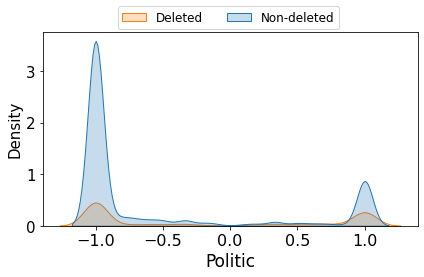

In [39]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v1(df, 'is_deleted','politic' ,'Politic' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_conditionaldistribution')

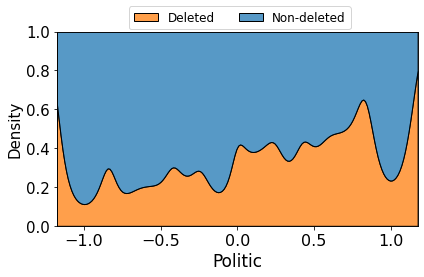

In [40]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v2(df, 'is_deleted','politic' ,'Politic' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_Normalizethestackeddistribution')

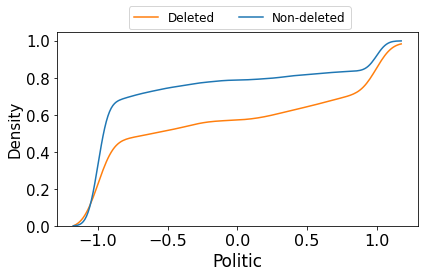

In [41]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v3(df, 'is_deleted','politic' ,'Politic' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_cumulativedistributionfunction')

# Histogram

***

In [32]:
def plot_histogram_kb(df, titel):
    #figure(figsize=(8, 6), dpi=80)
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    #labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('royalblue')
    patches[1].set_label('Liberal')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('crimson')
    patches[9].set_label('Conservative')
    
          
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Number of users', fontsize=16)
    ax.set_xlabel(xlabel='Politic', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=12)
    plt.tight_layout()
    plt.savefig('../plots/'+titel+'.pdf')

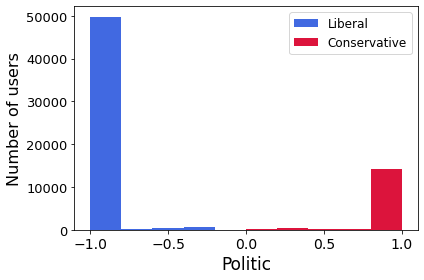

In [33]:
#All Tweets
df = df_tweetskb.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['politic'],'hist_tweetsKB_political_polarized_users(alltweets)')

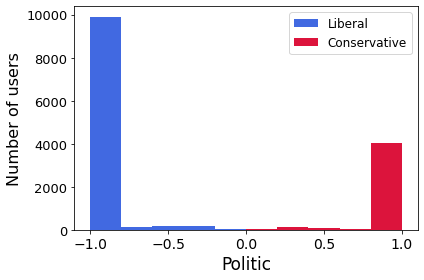

In [34]:
df = df_tweetskb_del.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['politic'],'hist_tweetsKB_political_polarized_users(deletedtweets)')

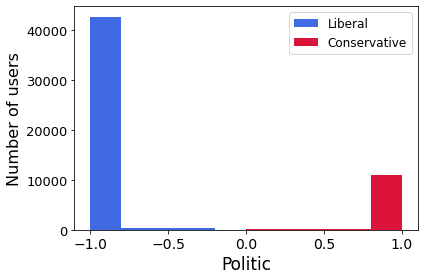

In [35]:
df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['politic'],'hist_tweetsKB_political_polarized_users(nondeletedtweets)')

***

# Hexabin
### Reputation-Polarisierung

***

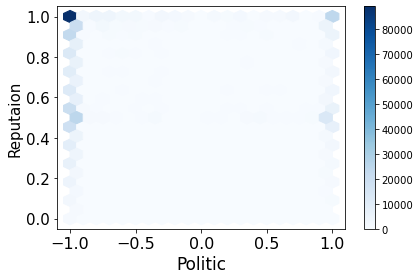

In [36]:
df = df_tweetskb[['is_deleted', 'politic', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted', 'politic', 'Politic', 'Blues', 'Hexabinplot_tweetskb_political_reputation(alltweets)')

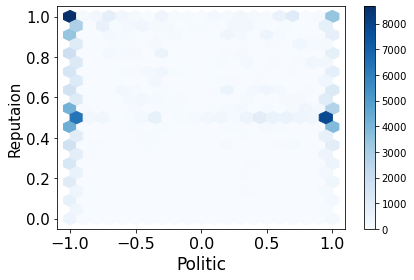

In [37]:
plot_hexbin_reputaion(df_del, 'is_deleted', 'politic', 'Politic', 'Blues','Hexabinplot_tweetskb_political_reputation(deletedtweets)')

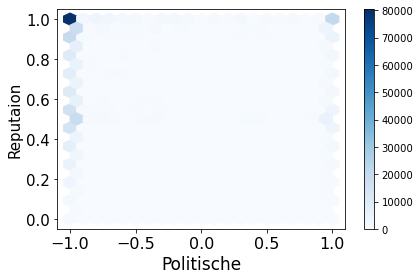

In [38]:
plot_hexbin_reputaion(df_undel, 'is_deleted', 'politic', 'Politische', 'Blues', 'Hexabinplot_tweetskb_political_reputation(nondeletedtweets)')